<a href="https://colab.research.google.com/github/NICKLEESON1970/TelecomX_parte2_Latam/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del DataFrame:
   customerID  Churn  Genero  AdultoMayor  Pareja  Dependientes  \
0  0002-ORFBO      0  Female            0       1             1   
1  0003-MKNFE      0    Male            0       0             0   
2  0004-TLHLJ      1    Male            0       0             0   
3  0011-IGKFF      1    Male            1       1             0   
4  0013-EXCHZ      1  Female            1       1             0   

   MesesContrato  ServicioTelefonico  LineasMultiples ServicioInternet  ...  \
0              9                   1              0.0              DSL  ...   
1              9                   1              1.0              DSL  ...   
2              4                   1              0.0      Fiber optic  ...   
3             13                   1              0.0      Fiber optic  ...   
4              3                   1              0.0      Fiber optic  ...   

   SoporteTecnico  StreamingTV  StreamingMovies    TipoContrato  \
0             1.0        

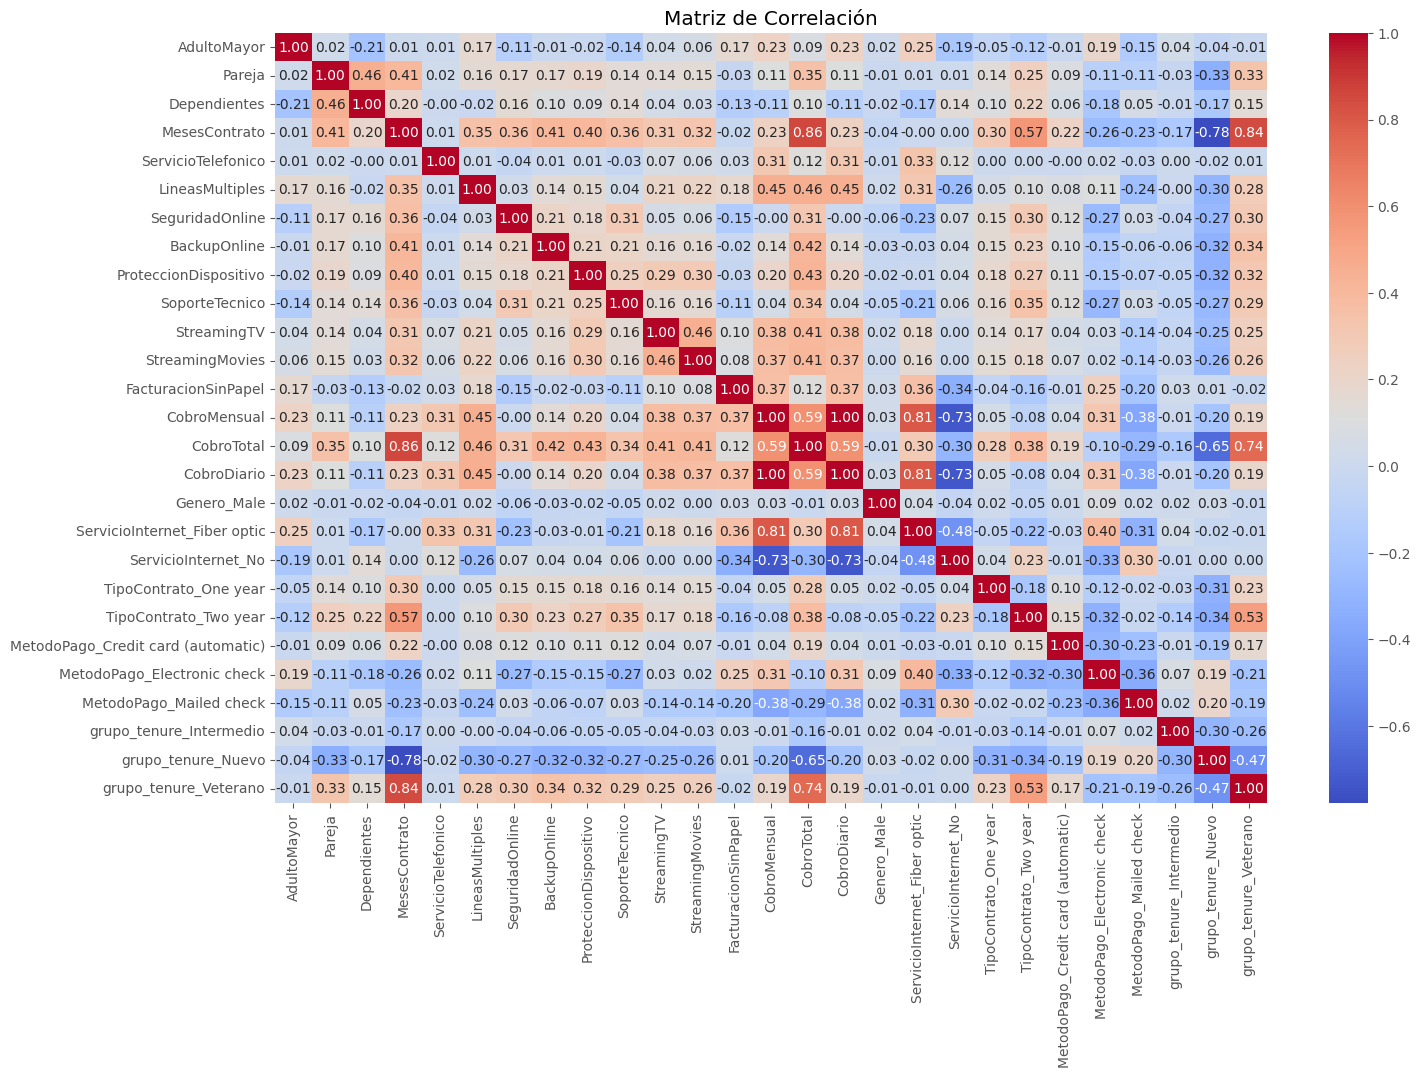

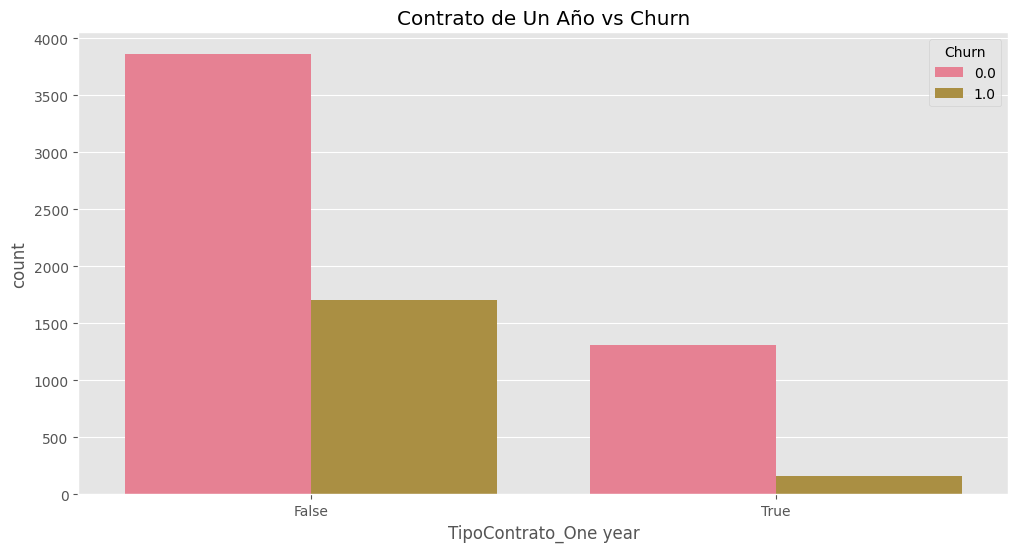

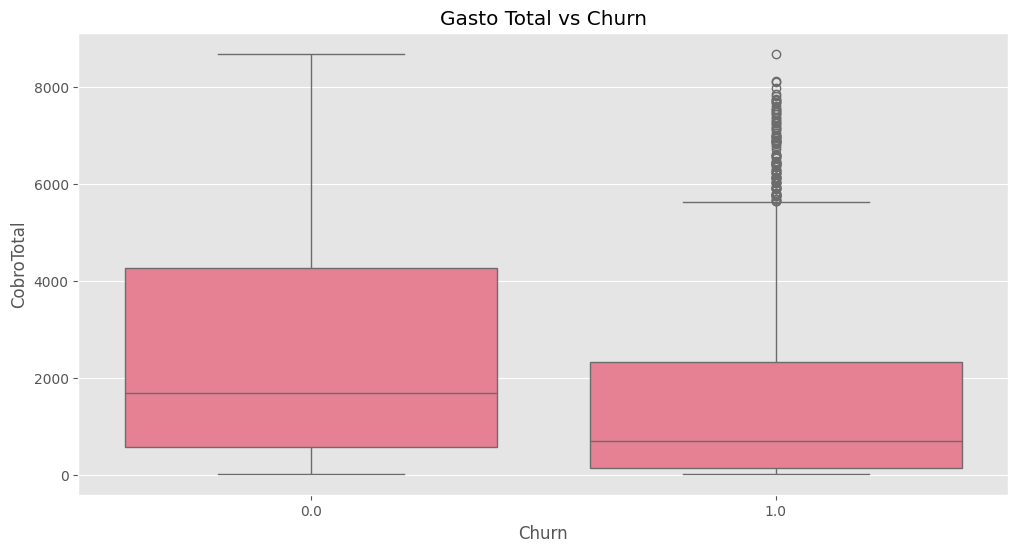


Evaluación del Modelo: Regresión Logística
Accuracy: 0.7851
Precisión: 0.7672
Recall: 0.8008
F1-score: 0.7836
Matriz de Confusión:
[[818 244]
 [200 804]]
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1062
         1.0       0.77      0.80      0.78      1004

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



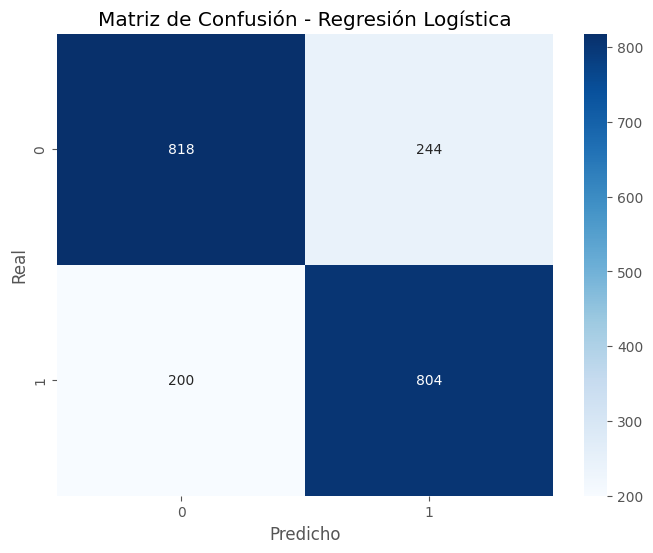


Evaluación del Modelo: Random Forest
Accuracy: 0.8582
Precisión: 0.8669
Recall: 0.8367
F1-score: 0.8515
Matriz de Confusión:
[[933 129]
 [164 840]]
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1062
         1.0       0.87      0.84      0.85      1004

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



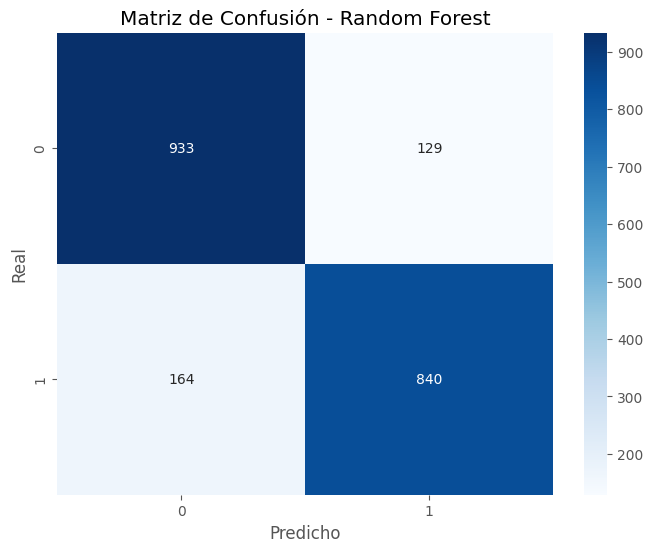


Evaluación del Modelo: Support Vector Machine
Accuracy: 0.8277
Precisión: 0.8202
Recall: 0.8267
F1-score: 0.8234
Matriz de Confusión:
[[880 182]
 [174 830]]
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1062
         1.0       0.82      0.83      0.82      1004

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



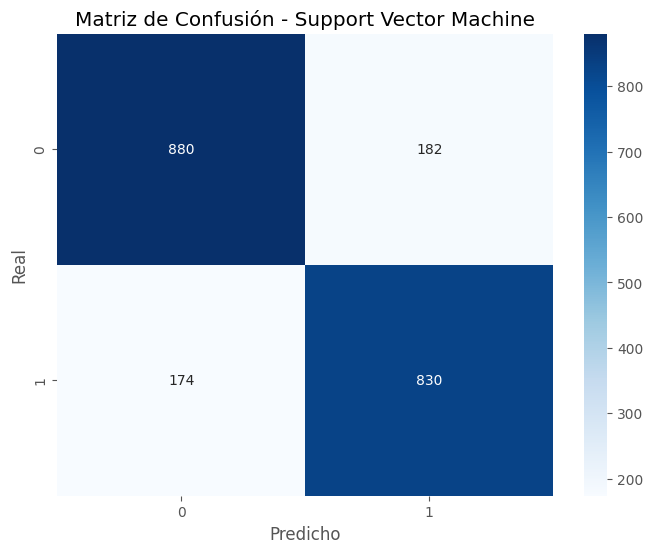


Coeficientes de Regresión Logística:
                                    Coeficiente
MetodoPago_Electronic check            0.920697
ServicioInternet_Fiber optic           0.881695
CobroTotal                             0.657725
MetodoPago_Mailed check                0.557668
MetodoPago_Credit card (automatic)     0.498835
grupo_tenure_Veterano                  0.281004
Genero_Male                            0.247807
LineasMultiples                        0.208512
FacturacionSinPapel                    0.193989
StreamingTV                            0.187398

Importancia de Variables en Random Forest:
                              Importancia
MesesContrato                    0.106583
CobroTotal                       0.104723
MetodoPago_Electronic check      0.093994
CobroDiario                      0.081923
CobroMensual                     0.081672
SeguridadOnline                  0.068906
SoporteTecnico                   0.068547
ServicioInternet_Fiber optic     0.039761
FacturacionS

In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Cargar la base de datos desde GitHub
url = 'https://raw.githubusercontent.com/NICKLEESON1970/TelecomX_parte2_Latam/main/datos_tratados.csv '
data = pd.read_csv(url)

# Exploración inicial de los datos
print("Primeras filas del DataFrame:")
print(data.head())

print("\nInformación general del DataFrame:")
print(data.info())

print("\nResumen estadístico del DataFrame:")
print(data.describe())

print("\nColumnas del DataFrame:")
print(data.columns)

# Eliminación de columnas irrelevantes
columns_to_drop = ['customerID']  # Añade aquí cualquier otra columna irrelevante
data = data.drop(columns=columns_to_drop)

# Separar columnas numéricas y categóricas
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Imputar valores faltantes en columnas numéricas con la media
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Imputar valores faltantes en columnas categóricas con la moda
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Codificación de variables categóricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Verificación de la proporción de cancelación (Churn)
churn_proportion = data_encoded['Churn'].value_counts(normalize=True)
print(f"\nProporción de Churn: {churn_proportion}")

# Balanceo de clases (opcional)
smote = SMOTE(random_state=42)
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalización (si es necesario)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Análisis de Correlación
plt.figure(figsize=(16, 10))
correlation_matrix = pd.DataFrame(X_resampled_scaled, columns=X.columns).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Análisis Dirigido
# Tiempo de contrato × Cancelación
plt.figure(figsize=(12, 6))
sns.countplot(x='TipoContrato_One year', hue='Churn', data=data_encoded)
plt.title('Contrato de Un Año vs Churn')
plt.show()

# Gasto total × Cancelación
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='CobroTotal', data=data_encoded)
plt.title('Gasto Total vs Churn')
plt.show()

# Separación de Datos
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Creación de Modelos
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Modelo 2: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Modelo 3: Support Vector Machine (SVM)
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm_clf = svm_clf.predict(X_test)

# Evaluación de los Modelos
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"\nEvaluación del Modelo: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Matriz de Confusión:\n{conf_matrix}")
    print(f"Reporte de Clasificación:\n{class_report}")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

evaluate_model(y_test, y_pred_log_reg, 'Regresión Logística')
evaluate_model(y_test, y_pred_rf_clf, 'Random Forest')
evaluate_model(y_test, y_pred_svm_clf, 'Support Vector Machine')

# Análisis de la Importancia de las Variables
# Regresión Logística
log_reg_coef = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coeficiente'])
log_reg_coef = log_reg_coef.sort_values(by='Coeficiente', ascending=False)
print(f"\nCoeficientes de Regresión Logística:\n{log_reg_coef.head(10)}")

# Random Forest
feature_importance_rf = pd.DataFrame(rf_clf.feature_importances_, index=X.columns, columns=['Importancia'])
feature_importance_rf = feature_importance_rf.sort_values(by='Importancia', ascending=False)
print(f"\nImportancia de Variables en Random Forest:\n{feature_importance_rf.head(10)}")

# Support Vector Machine (SVM)
# Para SVM, los coeficientes no están disponibles directamente, pero podemos usar la importancia de las variables
# a través de técnicas como SHAP o LIME. Aquí usaremos una aproximación simple.
# Nota: SVM no proporciona importancia de características directamente.
# Podemos usar coeficientes si usamos un kernel lineal, pero en este caso usaremos Random Forest para simplicidad.

# Conclusión
print("\nConclusión:")
print("Los principales factores que afectan la cancelación de clientes, según los modelos, son:")

# Mostrar los factores más importantes de Random Forest
print(feature_importance_rf.head(5))

print("\nSe recomienda enfocarse en estrategias de retención basadas en estos factores.")

# Estrategias de Retención
# Basadas en los factores más importantes identificados, podemos proponer estrategias de retención.
# Por ejemplo, si el contrato mes a mes es un factor importante, la empresa podría ofrecer incentivos para convertir contratos a uno año o más.
# Si el gasto total es bajo, la empresa podría ofrecer planes más atractivos o descuentos.
# Si el soporte técnico es un factor importante, la empresa podría mejorar la calidad del servicio de soporte.

# Propuestas de Estrategias de Retención
estrategias_retencion = {
    'TipoContrato_One year': "Ofrecer incentivos para convertir contratos a uno año o más.",
    'CobroTotal': "Ofrecer planes más atractivos o descuentos para aumentar el gasto total de los clientes.",
    'SoporteTecnico_Yes': "Mejorar la calidad del servicio de soporte técnico para reducir la percepción de problemas técnicos.",
    'ServicioInternet_Fiber optic': "Mejorar la calidad del servicio de internet de fibra óptica para satisfacer a los clientes con este servicio.",
    'ServicioInternet_No': "Investigar por qué los clientes sin servicio de internet tienden a cancelar y ofrecer alternativas atractivas."
}

print("\nEstrategias de Retención:")
for factor, estrategia in estrategias_retencion.items():
    print(f"- {factor}: {estrategia}")

# Guardar los resultados en un informe
with open('informe_analisis_churn.txt', 'w') as f:
    f.write("Primeras filas del DataFrame:\n")
    f.write(str(data.head()))
    f.write("\n\nInformación general del DataFrame:\n")
    f.write(str(data.info()))
    f.write("\n\nResumen estadístico del DataFrame:\n")
    f.write(str(data.describe()))
    f.write("\n\nColumnas del DataFrame:\n")
    f.write(str(data.columns))
    f.write("\n\nProporción de Churn:\n")
    f.write(str(churn_proportion))
    f.write("\n\nEvaluación del Modelo: Regresión Logística\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}\n")
    f.write(f"Precisión: {precision_score(y_test, y_pred_log_reg):.4f}\n")
    f.write(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}\n")
    f.write(f"F1-score: {f1_score(y_test, y_pred_log_reg):.4f}\n")
    f.write(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_log_reg)}\n")
    f.write(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_log_reg)}\n")
    f.write("\nEvaluación del Modelo: Random Forest\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred_rf_clf):.4f}\n")
    f.write(f"Precisión: {precision_score(y_test, y_pred_rf_clf):.4f}\n")
    f.write(f"Recall: {recall_score(y_test, y_pred_rf_clf):.4f}\n")
    f.write(f"F1-score: {f1_score(y_test, y_pred_rf_clf):.4f}\n")
    f.write(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_rf_clf)}\n")
    f.write(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_rf_clf)}\n")
    f.write("\nEvaluación del Modelo: Support Vector Machine\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred_svm_clf):.4f}\n")
    f.write(f"Precisión: {precision_score(y_test, y_pred_svm_clf):.4f}\n")
    f.write(f"Recall: {recall_score(y_test, y_pred_svm_clf):.4f}\n")
    f.write(f"F1-score: {f1_score(y_test, y_pred_svm_clf):.4f}\n")
    f.write(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred_svm_clf)}\n")
    f.write(f"Reporte de Clasificación:\n{classification_report(y_test, y_pred_svm_clf)}\n")
    f.write("\nCoeficientes de Regresión Logística:\n")
    f.write(str(log_reg_coef.head(10)))
    f.write("\n\nImportancia de Variables en Random Forest:\n")
    f.write(str(feature_importance_rf.head(10)))
    f.write("\n\nConclusión:\n")
    f.write("Los principales factores que afectan la cancelación de clientes, según los modelos, son:\n")
    f.write(str(feature_importance_rf.head(5)))
    f.write("\n\nSe recomienda enfocarse en estrategias de retención basadas en estos factores.\n")
    f.write("\nEstrategias de Retención:\n")
    for factor, estrategia in estrategias_retencion.items():
        f.write(f"- {factor}: {estrategia}\n")